<a href="https://colab.research.google.com/github/Ashwin2708/Stock-Market-Prediction-using-LSTM/blob/main/Stock_Market_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First we import the libraries to support our program
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738731
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122368
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095390


In [ ]:
#Get the number of rows and colums in the data set
df.shape

(2012, 6)

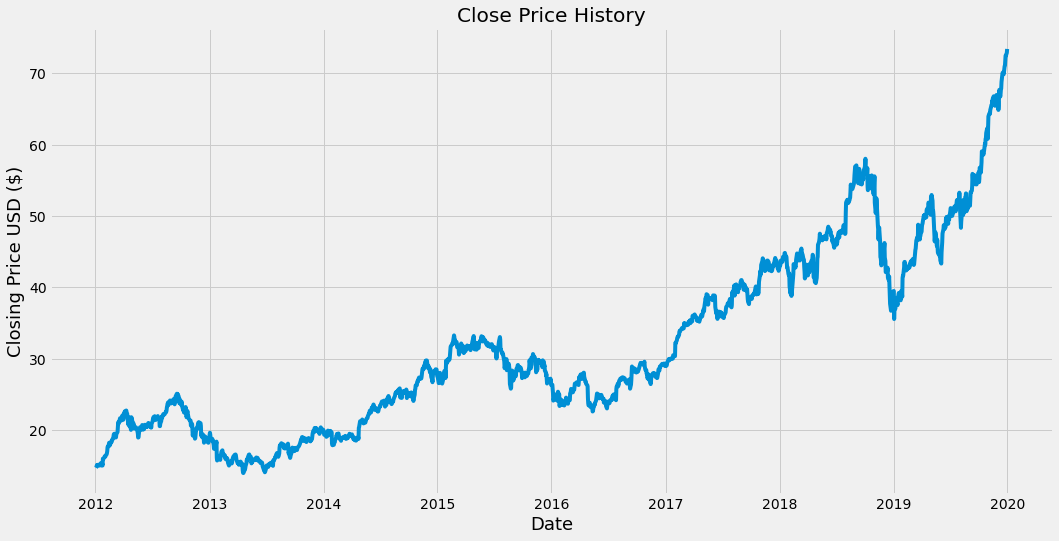

In [ ]:
#Visualize the closing price hsitory
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Conver the dataframe to a numpy array
dataset = data.values
#Get the  number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1610

In [ ]:
#It is always important to SCALE THE DATA
#Scaling the data makes it easier to present in RNN
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [ ]:
#Create the training dataset
#Create the scaled training data
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train & y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01243228, 0.01375958, 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758536, 0.02052227,
       0.02317089, 0.02235408, 0.01787965, 0.02214988, 0.01794572,
       0.0337113 , 0.03249211, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434759, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123612,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096589, 0.09287577, 0.09697783, 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938586, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
[0.13172814323221588]



In [ ]:
#Let's convert the x_train & Y-train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1550, 60)

In [ ]:
#Reshape the data
#A LSTM network expects the data to be 3 dimensional, i.e.,
#1: number of samples
#2: number of time steps
#3: number of features
#IMP from python POV
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [ ]:
#Build an LSTM Model that contains Layers
#Creating layers can provide better security
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the Model
model.compile(optimizer = 'adam', loss='mean_squared_error')

#Train the current model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1550/1550 [==============================] - 58s 35ms/step - loss: 6.2082e-04


In [ ]:
#Create the testig dataset
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create X and Y test data set
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Conver the Data into a numpy array
x_test = np.array(x_test)

In [ ]:
#Again reshape the data set for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the predicted price value for x test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the RMSE for accuracy and efficiency
#also the low value of RSME gives the good fit yeilds
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.2273007577924586

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


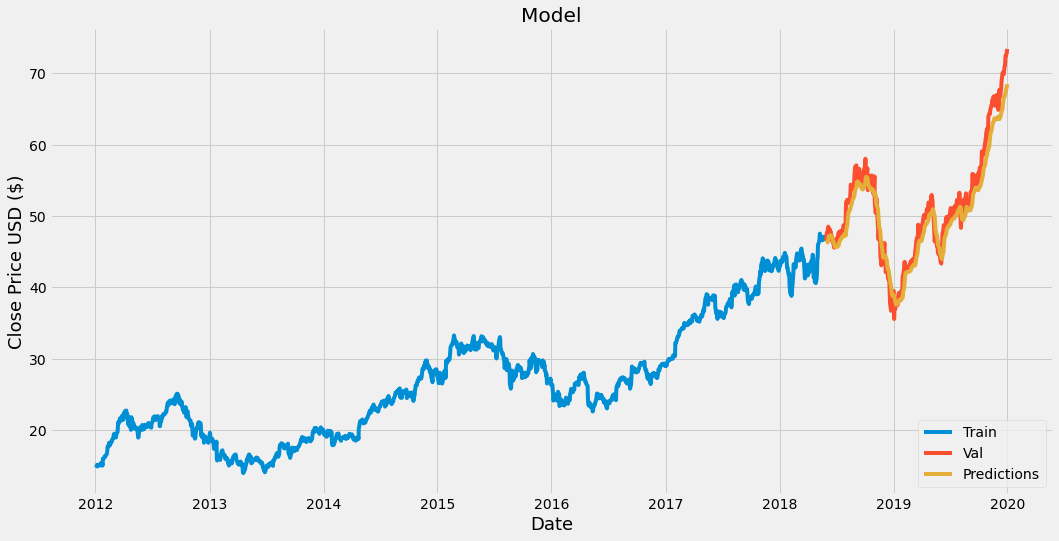

In [ ]:
from IPython.core.pylabtools import figsize
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2018-05-29,46.974998,46.231888
2018-05-30,46.875000,46.265171
2018-05-31,46.717499,46.271355
2018-06-01,47.560001,46.244431
2018-06-04,47.957500,46.325809
...,...,...
2019-12-24,71.067497,66.990601
2019-12-26,72.477501,67.252457
2019-12-27,72.449997,67.671524


In [ ]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days of data
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days data
X_test.append(last_60_days_scaled)
#Convert the X-test data set into numpy array
X_test = np.array(X_test)
#Reshape for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Define predicted price
pred_price = model.predict(X_test)
#Get the predicted scaled price
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[68.8572]]


In [ ]:
# Final Predictions
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-30', end='2019-12-31')
print(apple_quote2['Close'])

Date
2019-12-30    72.879997
2019-12-31    73.412498
Name: Close, dtype: float64
